# Homework 4:

Duo Xu

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy import optimize as opt
import corner
import random

In [2]:
with open("data.pkl", "rb") as handle:
    data = pickle.load(handle).T

## Problem 1. Corner Plot

In [3]:
def mu(t, B, A1, A2, A3, A4, T):
    return (B + A1*np.cos(2*np.pi*t/100) + A2*np.sin(2*np.pi*t/100) +
            A3*np.cos(2*np.pi*t/T) + A4*np.sin(2*np.pi*t/T))
    
def loglike(t, paras, data, info):
    B, A1, A2, A3, A4, T = paras
    y = data
    sigma = info
    temp = y - mu(t, B, A1, A2, A3, A4, T)
    summ = np.sum(temp**2/sigma)
    return -0.5*summ

def llt(T, t, paras, data, info):
    B, A1, A2, A3, A4 = paras
    y = data
    sigma = info
    temp = y - mu(t, B, A1, A2, A3, A4, T)
    summ = np.sum(temp**2/sigma)
    return 0.5*summ

def fitT(T, t, data, info):
    def ll(paras):
        return llt(T, t, paras, data, info)
    x0 = [1,1,1,1,1]
    return opt.minimize(ll, x0).x

T = np.linspace(1, 650, 128)
A = np.linspace(-8, 8, 25)

def priorA(A, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*(A)**2/sigma**2)

def priorT(T):
    temp = np.where(np.logical_and(T > 50, T < 500), 1/T, 0)
    return temp
    
loglikeT = []
for i in range(len(T)):
    paras = fitT(T[i], data[0], data[12], data[1])
    loglikeT.append(loglike(data[0], [paras[0], paras[1], paras[2], paras[3], 
                                paras[4], T[i]], data[12], data[1]))


maxind = loglikeT.index(max(loglikeT))
maxT = (T[maxind])

N = 500000
T1 = maxind
loglikeT = loglikeT - min(loglikeT) + np.log(priorT(T))
sampleT = []
for i in range(N):
    Tnew = T1 + random.randint(0,1)*2-1
    if Tnew < 128 and Tnew >= 0:
        r = loglikeT[Tnew]/loglikeT[T1]
        if r > np.random.rand():
            T1 = Tnew
        sampleT.append(T[T1])
        
def bestfit(T, t, data, info):
    def ll(paras):
        return llt(T, t, paras, data, info)
    x0 = [1,1,1,1,1]
    return opt.minimize(ll, x0).x, opt.minimize(ll, x0).hess_inv

bestfits = bestfit(maxT, data[0], data[12], data[1])[0]

loglikeB = []
loglikeA1 = []
loglikeA2 = []
loglikeA3 = []
loglikeA4 = []
for j in range(len(A)):
    paras = bestfits
    loglikeB.append(loglike(data[0], [A[j], paras[1], paras[2], paras[3], 
                                paras[4], maxT], data[12], data[1]))
    loglikeA1.append(loglike(data[0], [paras[0], A[j], paras[2], paras[3], 
                                paras[4], maxT], data[12], data[1]))
    loglikeA2.append(loglike(data[0], [paras[0], paras[1], A[j], paras[3], 
                                paras[4], maxT], data[12], data[1]))
    loglikeA3.append(loglike(data[0], [paras[0], paras[1], paras[2], A[j], 
                                paras[4], maxT], data[12], data[1]))
    loglikeA4.append(loglike(data[0], [paras[0], paras[1], paras[2], paras[3], 
                                A[j], maxT], data[12], data[1]))


loglikeB = loglikeB - min(loglikeB)
loglikeA1 = loglikeA1 - min(loglikeA1)
loglikeA2 = loglikeA2 - min(loglikeA2)
loglikeA3 = loglikeA3 - min(loglikeA3)
loglikeA4 = loglikeA4 - min(loglikeA4)
loglikes = [loglikeB, loglikeA1, loglikeA2, loglikeA3, loglikeA4]


sample = []
for i in range(5):
    x = list(loglikes[i]).index(max(loglikes[i]))
    sample.append([])
    logf = loglikes[i] + priorA(A, 1)
    for j in range(N):
        xnew = x + random.randint(0,1)*2-1
        if xnew < 25 and xnew >= 0:
            r = logf[xnew]/logf[x]
            if r > np.random.rand():
                x = xnew
        sample[i].append(A[x]) 

sample.append(sampleT)

C:\Users\Xuduo\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


Text(0.5, 0, 'T')

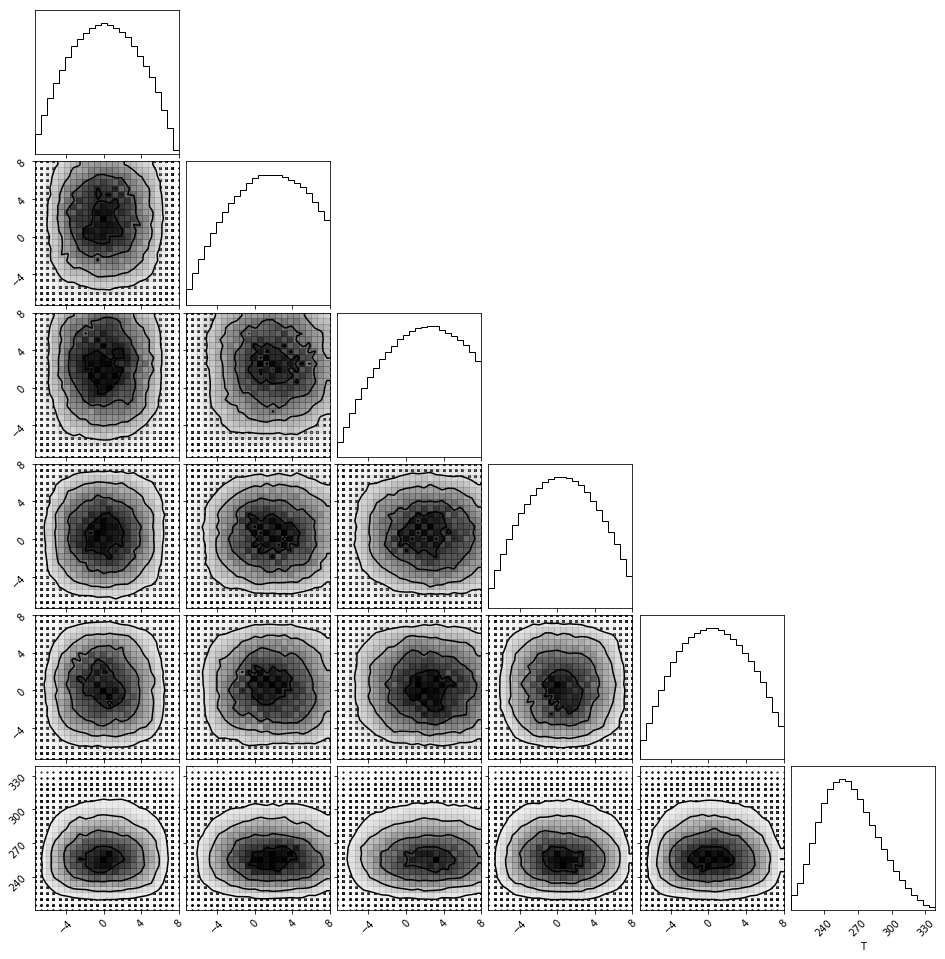

In [12]:
cornersample = np.array(sample).T
figure = corner.corner(cornersample, bins = 24)
plt.xlabel('T')

Above is a corner plot of the posterior sampling where MCMC was used to sample from a function proportional to the log posterior.

## Problem 2.  Residual Plot

Text(0.5, 1.0, 'residual plot modulo best-fit second period T')

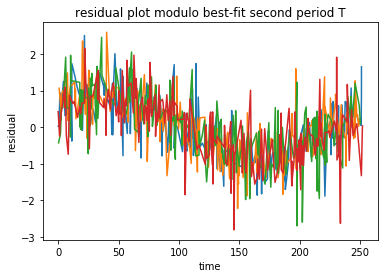

In [5]:
def mu1(t, B, A1, A2):
    return B + A1*np.cos(2*np.pi*t/100) + A2*np.sin(2*np.pi*t/100)

def loglike1(t, paras, data, info):
    B, A1, A2 = paras
    y = data
    sigma = info
    temp = y - mu1(t, B, A1, A2)
    summ = np.sum(temp**2/sigma)
    return 0.5*summ

def bestfit1(t, data, info):
    def ll(paras):
        return loglike1(t, paras, data, info)
    x0 = [0,0,0]
    return opt.minimize(ll, x0).x, opt.minimize(ll, x0).hess_inv

fitpars = bestfit1(data[0], data[12], data[1])
T2nd = 252.381

min4 = sorted((data[0] % 252.381))[:4]
inds = [248]
for i in range(4):
    inds.append(list(data[0] % 252.381).index(min4[i]))
inds = np.sort(inds)

plt.figure()
for i in range(4):
    plt.plot((data[0] % T2nd)[inds[i]:inds[i+1]], 
             (data[12] - mu1(data[0], *fitpars[0]))[inds[i]:inds[i+1]])
plt.xlabel("time")
plt.ylabel("residual")
plt.title('residual plot modulo best-fit second period T')

By plotting the residuals away from the 100-days period model, folded at the period of the best fit second period T obtained by the two signals model, we can see that the residuals appear to be periodic at such period. Thus making the second period T we obatained much more believable.

## Problem 3. Model Selection

### K-fold cross validation with K = 8

In [6]:
indx = list(range(1024))
random.shuffle(indx)
indices = []
for i in range(8):
    indices.append(indx[128*i:128*(i+1)])

Chi1 = []
Chi2 = []
for k in range(8):
    
    fold8 = []
    for i in range(13):
        fold8.append(data[i][indices[k]])

    bestfits1 = []
    for i in range(2, 13):
        bestfits1.append(bestfit1(fold8[0], fold8[i], fold8[1])[0])

    def mu(t, B, A1, A2, A3, A4, T):
        return (B + A1*np.cos(2*np.pi*t/100) + A2*np.sin(2*np.pi*t/100) +
                A3*np.cos(2*np.pi*t/T) + A4*np.sin(2*np.pi*t/T))

    def loglike(t, paras, data, info):
        B, A1, A2, A3, A4, T = paras
        y = data
        sigma = info
        temp = y - mu(t, B, A1, A2, A3, A4, T)
        summ = np.sum(temp**2/sigma)
        return -0.5*summ

    def llt(T, t, paras, data, info):
        B, A1, A2, A3, A4 = paras
        y = data
        sigma = info
        temp = y - mu(t, B, A1, A2, A3, A4, T)
        summ = np.sum(temp**2/sigma)
        return 0.5*summ

    def fitT(T, t, data, info):
        def ll(paras):
            return llt(T, t, paras, data, info)
        x0 = [1,1,1,1,1]
        return opt.minimize(ll, x0).x

    T = np.linspace(50, 500, 64)
    val = []
    maxT = []
    for j in range(2, 13):
        val.append([])
        for i in range(len(T)):
            paras = fitT(T[i], fold8[0], fold8[j], fold8[1])
            val[j-2].append(loglike(fold8[0], [paras[0], paras[1], paras[2], paras[3], 
                                    paras[4], T[i]], fold8[j], fold8[1]))
        maxind = val[j-2].index(max(val[j-2]))
        maxT.append(T[maxind])

    def bestfit(T, t, data, info):
        def ll(paras):
            return llt(T, t, paras, data, info)
        x0 = [1,1,1,1,1]
        return opt.minimize(ll, x0).x, opt.minimize(ll, x0).hess_inv

    bestfits2 = []
    for i in range(2, 13):
        bestfits2.append(bestfit(maxT[i-2], fold8[0], fold8[i], fold8[1])[0])

    delta1 = []
    chi1 = []
    for i in range(11):
        temp = data[i+2][indices[k]] - mu1(data[0][indices[k]], *bestfits1[i])
        delta = temp/data[1][indices[k]]
        delta1.append(delta**2)
        chi1.append(np.sum(delta**2))


    delta2 = []
    chi2 = []
    for i in range(11):
        temp2 = data[i+2][indices[k]] - mu(data[0][indices[k]], *bestfits2[i],maxT[i])
        Delta = temp2/data[1][indices[k]]
        delta2.append(Delta**2)
        chi2.append(np.sum(Delta**2))
    
    Chi1.append(chi1)
    Chi2.append(chi2)

In [7]:
T = np.linspace(50, 500, 64)
val = []
maxT = []
for j in range(2, 13):
    val.append([])
    for i in range(len(T)):
        paras = fitT(T[i], data[0], data[j], data[1])
        val[j-2].append(loglike(data[0], [paras[0], paras[1], paras[2], paras[3], 
                                    paras[4], T[i]], data[j], data[1]))
    maxind = val[j-2].index(max(val[j-2]))
    maxT.append(T[maxind])

In [8]:
Diff = []
for i in range(8):
    diff = []
    for j in range(11):
        diff.append(Chi1[i][j] - Chi2[i][j])
    Diff.append(diff)

for i in range(8):
    for j in range(11):
        if Diff[i][j] > 35:
            print('The two signals model is significantly better in the ' + str(i+1) + 'th held-out eighth data set ' + str(j+1))
    


The two signals model is significantly better in the 1th held-out eighth data set 7
The two signals model is significantly better in the 1th held-out eighth data set 9
The two signals model is significantly better in the 1th held-out eighth data set 11
The two signals model is significantly better in the 2th held-out eighth data set 7
The two signals model is significantly better in the 2th held-out eighth data set 8
The two signals model is significantly better in the 2th held-out eighth data set 9
The two signals model is significantly better in the 2th held-out eighth data set 11
The two signals model is significantly better in the 3th held-out eighth data set 7
The two signals model is significantly better in the 3th held-out eighth data set 9
The two signals model is significantly better in the 3th held-out eighth data set 11
The two signals model is significantly better in the 4th held-out eighth data set 7
The two signals model is significantly better in the 4th held-out eighth 

By doing the K-fold cross validation with K = 8, we can conclude that the two signals model is the better model in data sets 7, 9, 11 confidently, while in data set 8 it is only marginally better. In all of the other data sets, the 100-days signal model is the better model.

### AIC and BIC

In [9]:
bestfitsmodel1 = []
for i in range(2, 13):
    bestfitsmodel1.append(bestfit1(data[0], data[i], data[1])[0])

maxloglike1 = []
for i in range(2, 13):
    maxloglike1.append(-loglike1(data[0], bestfitsmodel1[i-2], data[i], data[1]))


bestfitsmodel2 = []
for i in range(2, 13):
    bestfitsmodel2.append(bestfit(maxT[i-2], data[0], data[i], data[1])[0])

maxloglike2 = []
for i in range(2, 13):
    maxloglike2.append(loglike(data[0], [*bestfitsmodel2[i-2], maxT[i-2]], data[i], data[1]))


Text(0.5, 1.0, 'Difference between AIC and BIC of the two models (higher value = 2 signals model better)')

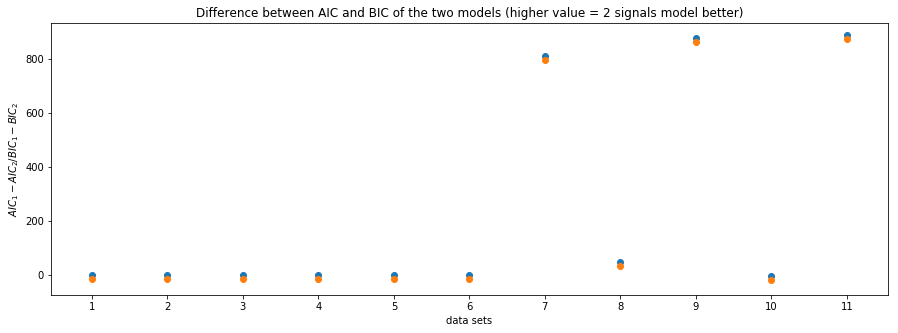

In [10]:
def AIC(k, lnLhat):
    return 2*k - 2*lnLhat

def BIC(k, n, lnLhat):
    return k*np.log(n) - 2*lnLhat

AICs1 = AIC(3, np.array(maxloglike1))
BICs1 = BIC(3, len(data[0]), np.array(maxloglike1))
AICs2 = AIC(6, np.array(maxloglike2))
BICs2 = BIC(6, len(data[0]), np.array(maxloglike2))

betterAIC = []
betterBIC = []
for i in range(11):
    if AICs1[i] - AICs2[i] > 10:
        betterAIC.append(i+1)
    if BICs1[i] - BICs2[i] > 10:
        betterBIC.append(i+1)
plt.figure(figsize=(15, 5))
plt.scatter(range(1, 12), AICs1 - AICs2, label = 'AIC')
plt.scatter(range(1, 12), BICs1 - BICs2, label = 'BIC')
plt.ylabel(r'$AIC_1 - AIC_2/BIC_1 - BIC_2$')
plt.xlabel('data sets')
plt.xticks(np.arange(1, 12))
plt.title('Difference between AIC and BIC of the two models (higher value = 2 signals model better)')

By computing the AIC and BIC of the two models, we can again conclude that the two signals model is the better model in data sets 7, 9, 11 confidently, while in data set 8 it is only marginally better. In all of the other data sets, the 100-days signal model is the better model.